In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
Contain = pd.read_csv("containment_and_mitigation_measure.csv")

In [3]:
Contain.head()

,Unnamed: 0,Country,Date Start,Description of measure implemented
0,1398,US:New York,"Mar 31, 2020","In March 30, 2020, the U.S. Navy medical ship ..."
1,1588,US: Massachussets,"Mar 31, 2020",The DCU Center was set up as a field hospital ...
2,1601,Brazil,"Mar 31, 2020",Mechanical Turk data n=70
3,1521,Czechia,"Mar 31, 2020","From Tuesday, March 31, 2020, from 12:00 am, a..."
4,110,Hong Kong,"Mar 30, 2020",Three people who broke their quarantine condit...


In [4]:
Contain["Date Start"]=pd.to_datetime(Contain["Date Start"])  #convert the date to pandas date time object

In [5]:
Contain.isnull().sum() # get the sum of the null values in each column

Unnamed: 0                             0
Country                               28
Date Start                            64
Description of measure implemented    63
dtype: int64

In [6]:
Contain.drop(["Unnamed: 0"], axis=1, inplace=True)
# drop unwanted columns

In [7]:
Contain

,Country,Date Start,Description of measure implemented
0,US:New York,2020-03-31,"In March 30, 2020, the U.S. Navy medical ship ..."
1,US: Massachussets,2020-03-31,The DCU Center was set up as a field hospital ...
2,Brazil,2020-03-31,Mechanical Turk data n=70
3,Czechia,2020-03-31,"From Tuesday, March 31, 2020, from 12:00 am, a..."
4,Hong Kong,2020-03-30,Three people who broke their quarantine condit...
...,...,...,...
1698,NaN,NaT,NaN
1699,Australia,NaT,NaN
1700,Italy,NaT,NaN
1701,NaN,NaT,NaN


In [8]:
Contain = Contain.dropna()
# drop all the records containing null values

In [9]:
Contain

,Country,Date Start,Description of measure implemented
0,US:New York,2020-03-31,"In March 30, 2020, the U.S. Navy medical ship ..."
1,US: Massachussets,2020-03-31,The DCU Center was set up as a field hospital ...
2,Brazil,2020-03-31,Mechanical Turk data n=70
3,Czechia,2020-03-31,"From Tuesday, March 31, 2020, from 12:00 am, a..."
4,Hong Kong,2020-03-30,Three people who broke their quarantine condit...
...,...,...,...
1634,US:Hawaii,2020-04-04,Gov. Ige and the Hawai‘i Department of Health ...
1635,US: Rhode Island,2020-04-03,State beaches and parks closed as of this date...
1636,US: Rhode Island,2020-04-03,Governor Raimondo announces three field hospit...
1637,US:Louisiana,2020-04-02,text alert system announced


In [10]:
Contain['Country'] = Contain['Country'].replace(to_replace='.*US.*', value='US', regex=True) # replace any word containing US in the country column with only the word US in order to count the records of the Us country as one

C:\Users\20102\AppData\Local\Temp\ipykernel_20008\116949003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Contain['Country'] = Contain['Country'].replace(to_replace='.*US.*', value='US', regex=True) # replace any word containing US in the country column with only the word US in order to count the records of the Us country as one


In [11]:
Contain

,Country,Date Start,Description of measure implemented
0,US,2020-03-31,"In March 30, 2020, the U.S. Navy medical ship ..."
1,US,2020-03-31,The DCU Center was set up as a field hospital ...
2,Brazil,2020-03-31,Mechanical Turk data n=70
3,Czechia,2020-03-31,"From Tuesday, March 31, 2020, from 12:00 am, a..."
4,Hong Kong,2020-03-30,Three people who broke their quarantine condit...
...,...,...,...
1634,US,2020-04-04,Gov. Ige and the Hawai‘i Department of Health ...
1635,US,2020-04-03,State beaches and parks closed as of this date...
1636,US,2020-04-03,Governor Raimondo announces three field hospit...
1637,US,2020-04-02,text alert system announced


In [12]:
Contain.drop_duplicates(subset='Country', keep='first', inplace=True) #drop any duplicate value in the Country column while leaving the first occurence in order to spot when exactly each country started taking containment measures against the covid

C:\Users\20102\AppData\Local\Temp\ipykernel_20008\31171299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Contain.drop_duplicates(subset='Country', keep='first', inplace=True) #drop any duplicate value in the Country column while leaving the first occurence in order to spot when exactly each country started taking containment measures against the covid


In [13]:
Contain

,Country,Date Start,Description of measure implemented
0,US,2020-03-31,"In March 30, 2020, the U.S. Navy medical ship ..."
2,Brazil,2020-03-31,Mechanical Turk data n=70
3,Czechia,2020-03-31,"From Tuesday, March 31, 2020, from 12:00 am, a..."
4,Hong Kong,2020-03-30,Three people who broke their quarantine condit...
12,South Korea,2020-03-28,Arrival national passengers from Europe & US w...
...,...,...,...
1279,China,2020-01-20,Case numbers rose to 136; Beijing and Shenzhen...
1288,European Union,2020-01-09,European Centre for Disease Prevention and Con...
1584,North Korea,2020-02-02,"""During the month of February, events, ceremon..."
1605,Trinidad and Tobago,2020-02-01,Trinidad and Tobago's travel restrictions on p...


In [14]:
Sort = Contain.sort_values(by='Date Start')
First_country = Sort.iloc[0]
Second_country = Sort.iloc[2]
Third_country = Sort.iloc[3]
Last1_country = Sort.iloc[-1]
Last2_country = Sort.iloc[-2]
Last3_country = Sort.iloc[-3]
print('The First Country that took early containment and mitigation measures against covid is  ',First_country['Country'])
print('The Second Country that took early containment and mitigation measures against covid is  ',Second_country['Country'])
print('The Third Country that took early containment and mitigation measures against covid is ',Third_country['Country'])
print('The Last Country that took early containment and mitigation measures against covid is ',Last1_country['Country'])
print('The Second Last Country that took early containment and mitigation measures against covid is ',Last2_country['Country'])
print('The Third Last Country that took early containment and mitigation measures against covid is ',Last3_country['Country'])
#Sort the dataset through the date in order to display the earliest and latest countries that took containment and mitigation measures against covid

The First Country that took early containment and mitigation measures against covid is   Macau
The Second Country that took early containment and mitigation measures against covid is   China
The Third Country that took early containment and mitigation measures against covid is  Trinidad and Tobago
The Last Country that took early containment and mitigation measures against covid is  US
The Second Last Country that took early containment and mitigation measures against covid is  Brazil
The Third Last Country that took early containment and mitigation measures against covid is  Czechia


In [15]:
Contain.to_csv("newcontainment.csv")

In [16]:
owid1 = pd.read_csv("newowid.csv")

In [17]:
owid1

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,...,diabetes_prevalence,female_smokers,male_smokers,season,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,months
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000,2
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000,2
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000,2
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000,2
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245939,245939,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,...,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975,2
245940,245940,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,...,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975,2
245941,245941,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,...,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975,2
245942,245942,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,...,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975,2


In [18]:
owid1.drop(["Unnamed: 0"],axis=1, inplace=True)
owid1.head()
#drop the unwanted column

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,diabetes_prevalence,female_smokers,male_smokers,season,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,months
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.0,0.0,0.0,0.0,0.0,2
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.0,0.0,0.0,0.0,0.0,2
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.0,0.0,0.0,0.0,0.0,2
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.0,0.0,0.0,0.0,0.0,2
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.0,0.0,0.0,0.0,0.0,2


In [19]:

owid1.groupby('location').sum()['new_cases'].sort_values(ascending = False) # Sum of the new cases according to each location in order to know  whether the number of cases in the countries who took early precautions any different from the rest of the countries

C:\Users\20102\AppData\Local\Temp\ipykernel_20008\303004192.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  owid1.groupby('location').sum()['new_cases'].sort_values(ascending = False) # Sum of the new cases according to each location in order to know  whether the number of cases in the countries who took early precautions any different from the rest of the countries


location
United States               103389953.0
India                        44690760.0
France                       40110188.0
Germany                      38144033.0
Brazil                       36934211.0
                               ...     
Northern Mariana Islands            0.0
Tokelau                             0.0
Northern Ireland                    0.0
Northern Cyprus                     0.0
Puerto Rico                         0.0
Name: new_cases, Length: 235, dtype: float64

In [20]:
owid1

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,diabetes_prevalence,female_smokers,male_smokers,season,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,months
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000,2
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000,2
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000,2
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000,2
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245939,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975,2
245940,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975,2
245941,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975,2
245942,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975,2


In [34]:
owid1['location'] = owid1['location'].replace('Trinidad and Tobago','Trin&Tob')
# replace the value Trinidad and Tobago  with Trin&Tob in the location column due to the limited space of the x axis in the plot

<Axes: xlabel='location', ylabel='new_cases'>

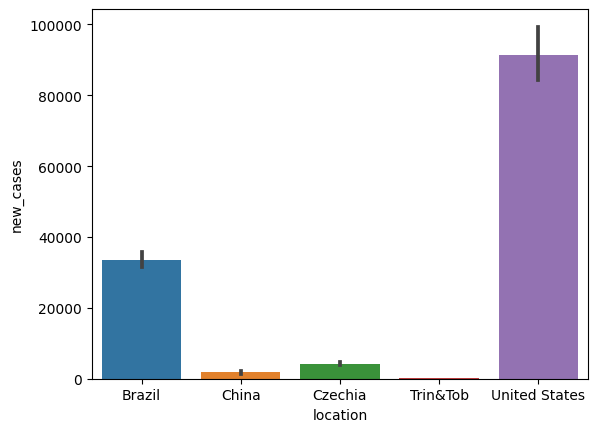

In [35]:
locations = ["Macau","China", "Trin&Tob", "United States","Brazil","Czechia"]
subset = owid1[owid1["location"].isin(locations)]
sns.barplot(x="location", y="new_cases", data=subset)
#Display the availible countries that are in the  owid1 dataset 
#which shows the new cases in the earliest and latest countries which were collected in the first part of the question.